# Discovering the data

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = pd.read_csv("BostonHousing.csv")

In [18]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
data.shape

(506, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Preparing data

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

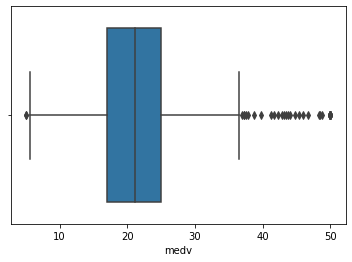

In [23]:
#Detecting outlier values 
sns.boxplot(data.medv)

In [27]:
#Delete outlier values
filter = data.medv<36
data = data[filter]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

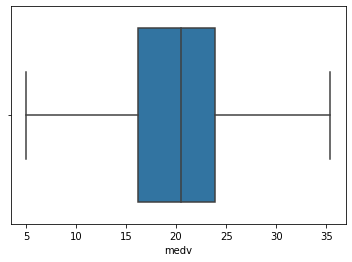

In [28]:
sns.boxplot(data.medv)

In [29]:
data.shape

(462, 14)

# Building, training the model 

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score #to test the performance of the model

In [44]:
Y = data.medv
X = data.drop('medv', axis=1)

In [45]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [46]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: medv, dtype: float64

In [47]:
#Train the data
#test_size = 0.2 : 80% 20% split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [48]:
model = linear_model.LinearRegression() #pepare the model

In [49]:
model.fit(X_train,Y_train) # train the model

LinearRegression()

In [50]:
PredictionY = model.predict(X_test)

In [51]:
#Hypothesis function parameters
coefficients = model.coef_ # teta1, teta2 ... : wheight features
intercept = model.intercept_ # teta0 : bias term
mse = mean_squared_error(Y_test,PredictionY) #calculate the different between real values and predicted values in the test phase
r2s = r2_score(Y_test,PredictionY) #measures the quality of the linear regression prediction : coefficient of determination

In [52]:
print("coefficients : "+ str(coefficients))
print("intercept : "+ str(intercept))
# Hypothesis function : Y = -1.001..*(CRIM) + 4.19...*(ZN) + ... + 36.38... 
print("mse : "+str(mse))
print("r2s : "+ str(r2s))

coefficients : [-1.24916455e-01  3.80192475e-02  1.43602630e-02  7.37768127e-01
 -1.25519297e+01  1.59124898e+00 -1.51851337e-02 -8.72968636e-01
  2.26998910e-01 -1.20188516e-02 -6.63573260e-01  5.99037127e-03
 -3.85307994e-01]
intercept : 40.075622326143844
mse : 6.9683675780552905
r2s : 0.8258819260998344


# Ploting data

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

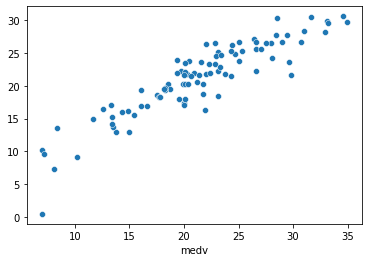

In [53]:
sns.scatterplot(Y_test, PredictionY)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

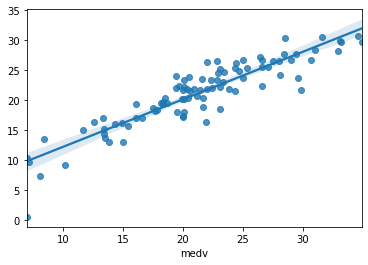

In [54]:
sns.regplot(Y_test, PredictionY)

# Saving the model

In [55]:
import pickle

In [56]:
pickle.dump(model,open('BHP_Prediction.pkl','wb'))